# CNN practice 

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
import numpy as np

In [54]:
mnist = np.load('mnist.npz')

In [55]:
mnist.files

['x_test', 'x_train', 'y_train', 'y_test']

In [56]:
(x_train, y_train),(x_test,y_test)  = (mnist['x_train'],mnist['y_train']),(mnist['x_test'],mnist['y_test'])

In [57]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


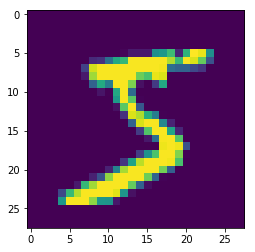

In [58]:
# look at one image frorm train data
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

In [59]:
x_train[0].shape

(28, 28)

In [60]:
total_classes = len(np.unique(y_train))
total_classes

10

# prepare the data to fit into shape required

In [61]:
x_train= x_train.reshape(60000,28,28,1).astype('float32')
x_test= x_test.reshape(10000,28,28,1).astype('float32')
input_shape = (28,28,1)  # shape of on image

In [62]:
# normalize the data  in range from 0 to 1
max_value= x_train.max()
x_train /= max_value
x_test /= max_value

In [35]:
from keras.utils.np_utils import to_categorical

# one hot encoded using on target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [36]:
print(y_train.shape)
print(y_test.shape)


(60000, 10)
(10000, 10)


# build a model using a simple cnn

In [37]:
from keras.models import Sequential
from keras.layers import Activation,Dense, Conv2D, MaxPooling2D, Flatten

In [38]:
model = Sequential()

model.add(Conv2D(64, activation='relu', input_shape=(28,28,1), kernel_size=3))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


In [39]:
from IPython.display import Image ,SVG
from keras.utils.vis_utils import model_to_dot

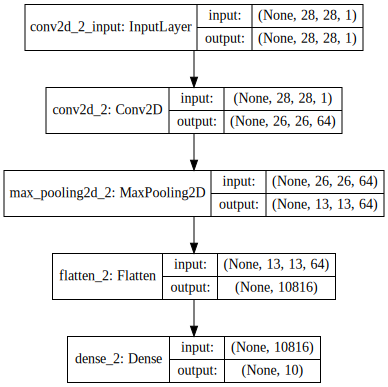

In [40]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# compiling the model

In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                108170    
Total params: 108,810
Trainable params: 108,810
Non-trainable params: 0
_________________________________________________________________


# training 

In [43]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=3, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 58s - loss: 0.1794 - acc: 0.9485 - val_loss: 0.0695 - val_acc: 0.9783
Epoch 2/3
60000/60000 [==============================] - 43s - loss: 0.0661 - acc: 0.9804 - val_loss: 0.0616 - val_acc: 0.9809
Epoch 3/3
60000/60000 [==============================] - 44s - loss: 0.0504 - acc: 0.9851 - val_loss: 0.0552 - val_acc: 0.9815


# make a predicton

In [44]:
x_test.shape

(10000, 28, 28, 1)

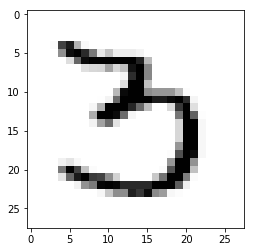

In [45]:
x_test_sample = x_test[780,:]
plt.imshow(x_test_sample.reshape(28,28), cmap=plt.cm.Greys);

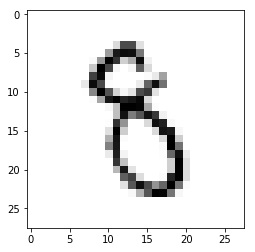

In [46]:
x_test_sample = x_test[781,:]
plt.imshow(x_test_sample.reshape(28,28), cmap=plt.cm.Greys);

In [47]:
model.predict_classes(x_test[[780,781],:])

2/2 [==============================] - 0s


array([3, 8])

# evaluation

In [48]:
y_test.shape

(10000, 10)

In [49]:
result= model.evaluate(x_test,y_test)

 9824/10000 [============================>.] - ETA: 0s

In [50]:
print(model.metrics_names)

['loss', 'acc']


In [51]:
print(result)

[0.0552145766927395, 0.9815]
